# Problem Statement
#Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data form desired location

In [146]:
df = pd.read_csv('tested.csv')

In [147]:
df.shape

(418, 12)

In [148]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Here we are droping the CABIN column because for given problem statements its of no use 

In [149]:
df.drop(columns=['Cabin'], inplace=True)

In [150]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


here checking dataset is having missing values or not  

In [152]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [153]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [154]:
df['Embarked'].fillna('S', inplace=True)

In [155]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

Here from above analyis we are getting the there is 1 missing value in Fare feature so for the fiiling value we are using the fillna command 
inplace = True because we are making modifications in actual dataset 

In [156]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [157]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

Now from above command age have 86 missing values. So in upcoming steps we want to add values in the age feature so data can be easily analyzed

In [158]:
np.random.randint(df['Age'].mean() - df['Age'].std(), df['Age'].mean() + df['Age'].std(), size=86)

array([22, 43, 16, 28, 33, 26, 30, 41, 25, 31, 39, 22, 19, 30, 26, 21, 41,
       31, 16, 35, 30, 24, 35, 20, 31, 27, 28, 23, 18, 42, 33, 33, 42, 41,
       33, 18, 23, 36, 24, 40, 17, 37, 33, 42, 36, 37, 32, 22, 22, 22, 42,
       27, 42, 36, 39, 21, 41, 39, 31, 19, 22, 34, 34, 35, 28, 18, 18, 35,
       20, 32, 29, 19, 25, 41, 24, 33, 21, 19, 21, 31, 31, 28, 32, 21, 43,
       23])

In [159]:
age_transformed = np.random.randint(df['Age'].mean() - df['Age'].std(), df['Age'].mean() + df['Age'].std(), size=86)

In [160]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool

In [161]:
missing_index = df['Age'].isnull()

In [162]:
df.loc[missing_index, 'Age'] = age_transformed

In [163]:
df['Age'].isnull().shape

(418,)

In [164]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [165]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

c:\Users\Mahesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


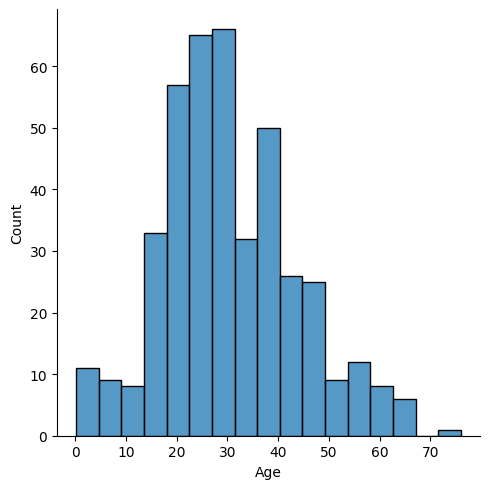

In [166]:

sns.displot(df['Age'])

## EDA

In [167]:
df['Pclass'] == 2

0      False
1      False
2       True
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Pclass, Length: 418, dtype: bool

In [168]:
df[df['Pclass'] == 3]['Survived'].value_counts()

Survived
0    146
1     72
Name: count, dtype: int64

In next section we are checking the percentage of people saved in Pclass 

In [169]:
df.groupby(df['Pclass'])['Survived'].mean()

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

From above output we are get to know the class 1 people were saved more than others

Conclusion: we cant drop the pclass column

In [170]:
df.groupby(df['Embarked'])['Survived'].mean()

Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64

In [171]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_5996\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

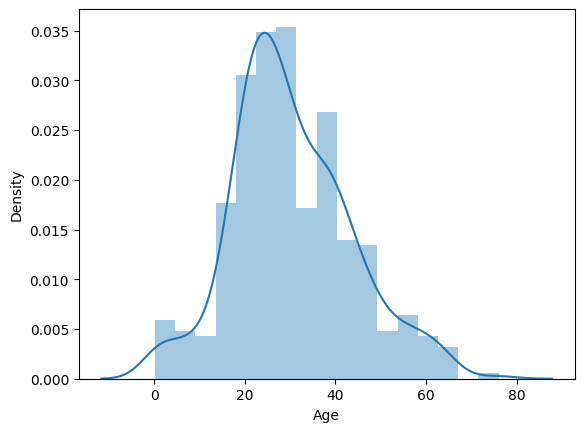

In [172]:
sns.distplot(df['Age'])

From the above graph we can conclude the age between 10-30 are more in that ship 

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_5996\1547070618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived'] == 0])
C:\Users\Mahesh\AppData\Local\Temp\ipykernel_5996\1547070618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived'] == 1])


<Axes: xlabel='Age', ylabel='Density'>

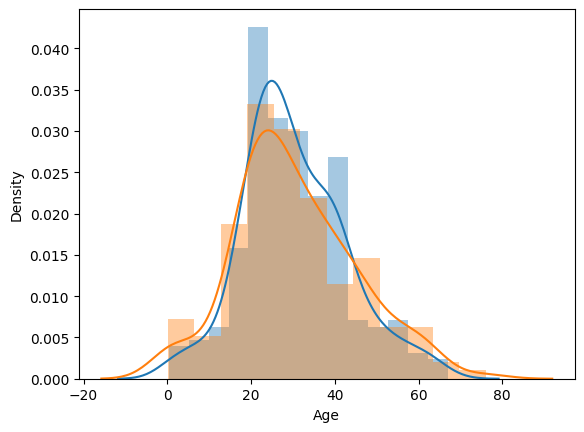

In [173]:
sns.distplot(df['Age'][df['Survived'] == 0])
sns.distplot(df['Age'][df['Survived'] == 1])

From this we can conclude that the those we have age more than 60 year they got survived more than others

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_5996\22600210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived'] == 0])
C:\Users\Mahesh\AppData\Local\Temp\ipykernel_5996\22600210.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived'] == 1])


<Axes: xlabel='Fare', ylabel='Density'>

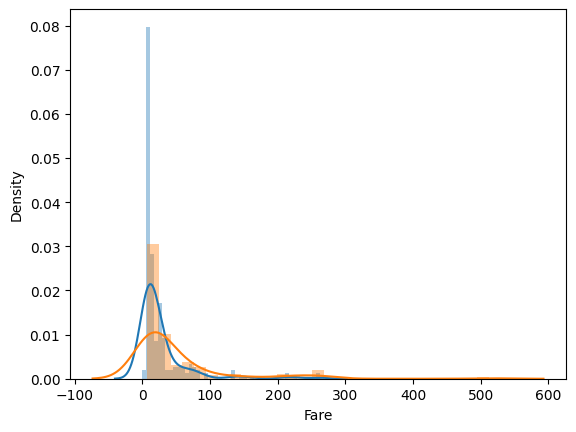

In [174]:
sns.distplot(df['Fare'][df['Survived'] == 0])
sns.distplot(df['Fare'][df['Survived'] == 1])

from above graph it is seen that the wherever fare is less there is less chances of the survival 

In [175]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [176]:
df.drop(columns=['Ticket'], inplace=True)

In [177]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
80,972,0,3,"Boulos, Master. Akar",male,6.0,1,1,15.2458,C
145,1037,0,3,"Vander Planke, Mr. Julius",male,31.0,3,0,18.0000,S
222,1114,1,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,10.5000,S
125,1017,1,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,16.1000,S
192,1084,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,14.5000,S


In [178]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [179]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
413,1305,0,3,"Spector, Mr. Woolf",male,23.0,0,0,8.05,S,1
94,986,0,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,26.00,C,1
93,985,0,3,"Guest, Mr. Robert",male,37.0,0,0,8.05,S,1
323,1215,0,1,"Rowe, Mr. Alfred G",male,33.0,0,0,26.55,S,1
87,979,1,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,8.05,S,1


In [180]:
df['Family'].value_counts()

Family
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

In [181]:
df.groupby(df['Family'])['Survived'].mean()

Family
1     0.268775
2     0.486486
3     0.526316
4     0.714286
5     0.285714
6     0.666667
7     0.250000
8     0.500000
11    0.500000
Name: Survived, dtype: float64

In [182]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"
    

In [183]:
df['Family_Size'] = df['Family'].apply(cal)

In [184]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
245,1137,0,1,"Kenyon, Mr. Frederick R",male,41.0,1,0,51.8625,S,2,Medium
17,909,0,3,"Assaf, Mr. Gerios",male,21.0,0,0,7.2250,C,1,Alone
23,915,0,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,61.3792,C,2,Medium
205,1097,0,1,"Omont, Mr. Alfred Fernand",male,30.0,0,0,25.7417,C,1,Alone
272,1164,1,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,136.7792,C,2,Medium


In [185]:
df.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [186]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size
103,995,0,3,"Johansson Palmquist, Mr. Oskar Leander",male,26.0,7.7750,S,Alone
169,1061,1,3,"Hellstrom, Miss. Hilda Maria",female,22.0,8.9625,S,Alone
359,1251,1,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,15.5500,S,Medium
282,1174,1,3,"Fleming, Miss. Honora",female,17.0,7.7500,Q,Alone
269,1161,0,3,"Pokrnic, Mr. Mate",male,17.0,8.6625,S,Alone


In [187]:
print(df.shape)

(418, 9)


In [188]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

In [190]:
df.drop(columns=['PassengerId','Name'], inplace=True)

In [191]:
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
112,1,1,female,36.0,31.6792,C,Alone
158,0,1,male,42.0,26.5500,S,Alone
157,1,3,female,23.0,7.8542,S,Alone
328,0,2,male,29.0,26.0000,S,Medium
213,1,2,female,60.0,26.0000,S,Medium


here Pclass, Sex, Embarked, Family_Size are the categorical data hence we need to convert into the categorical data 

Because algorithm fine with the numerical data 

In [192]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
0,0,3,male,34.5,7.8292,Q,Alone
1,1,3,female,47.0,7.0000,S,Medium
2,0,2,male,62.0,9.6875,Q,Alone
3,0,3,male,27.0,8.6625,S,Alone
4,1,3,female,22.0,12.2875,S,Medium
...,...,...,...,...,...,...,...
413,0,3,male,23.0,8.0500,S,Alone
414,1,1,female,39.0,108.9000,C,Alone
415,0,3,male,38.5,7.2500,S,Alone
416,0,3,male,25.0,8.0500,S,Alone


In [193]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex','Embarked','Family_Size'], drop_first=True)

In [194]:
df.shape

(418, 10)

In [195]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1: ]
y = df.iloc[:,0:1]

In [196]:
y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [198]:
X_train

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_Large,Family_Size_Medium
254,32.5,9.5000,False,True,True,False,True,False,False
218,50.0,211.5000,False,False,False,False,False,False,True
53,28.0,263.0000,False,False,False,False,True,True,False
34,30.0,57.7500,False,False,True,False,False,False,True
246,22.0,21.0000,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
345,16.0,7.6500,False,True,False,False,True,False,False
65,20.0,21.0000,True,False,False,False,True,False,False
405,20.0,13.8625,True,False,True,False,False,False,False
0,34.5,7.8292,False,True,True,True,False,False,False


In [199]:
y_test

,Survived
242,0
360,0
409,1
356,1
233,0
...,...
47,0
12,1
177,0
137,0


In [200]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [201]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [202]:
y_pred = classifier.predict(X_test)

In [203]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0